In [3]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from sklearn.model_selection import train_test_split

# to plot the model

In [4]:
from keras.utils import plot_model

# dataset

In [5]:
my_data = {
    'x1':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'x2':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'y':[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
}



In [6]:
df = pd.DataFrame(my_data)


In [7]:
df.head(3)

,x1,x2,y
0,1,1,2
1,2,2,4
2,3,3,6


In [8]:
X = df[['x1', 'x2']]

In [9]:
X.columns

Index(['x1', 'x2'], dtype='object')

In [10]:
X = df.iloc[:,0:2]
y = df.iloc[:,2:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# creating neural network model

In [11]:
model = Sequential()

# Adding input layers

In [12]:
model.add(InputLayer(input_shape=(2,), name="first_input_layer"))

# adding a hidden layer with 4 neurons

In [13]:
model.add(Dense(6, activation='relu'))

# Adding another hidden layer with 6 neurons

In [14]:
model.add(Dense(6, activation='relu'))

# Finally the output layer

In [15]:
model.add(Dense(1, activation='linear'))

In [16]:
model.compile(optimizer='adam', loss="mean_squared_error", metrics=['mse'] )

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


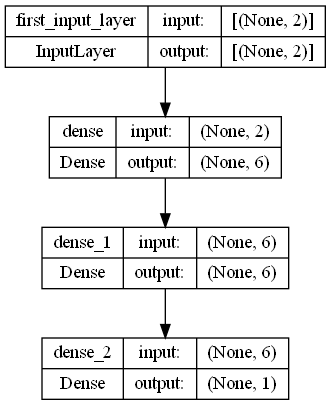

In [18]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [25]:
history = model.fit(X_train, y_train, epochs=400, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/400
18/18 [==============================] - 0s 6ms/step - loss: 0.0388 - mse: 0.0388 - val_loss: 0.0831 - val_mse: 0.0831
Epoch 2/400
18/18 [==============================] - 0s 6ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0837 - val_mse: 0.0837
Epoch 3/400
18/18 [==============================] - 0s 4ms/step - loss: 0.0338 - mse: 0.0338 - val_loss: 0.0772 - val_mse: 0.0772
Epoch 4/400
18/18 [==============================] - 0s 6ms/step - loss: 0.0332 - mse: 0.0332 - val_loss: 0.0773 - val_mse: 0.0773
Epoch 5/400
18/18 [==============================] - 0s 4ms/step - loss: 0.0333 - mse: 0.0333 - val_loss: 0.0753 - val_mse: 0.0753
Epoch 6/400
18/18 [==============================] - 0s 4ms/step - loss: 0.0336 - mse: 0.0336 - val_loss: 0.0791 - val_mse: 0.0791
Epoch 7/400
18/18 [==============================] - 0s 7ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0681 - val_mse: 0.0681
Epoch 8/400
18/18 [==============================] - 0s 5ms/step - loss: 0.0307 - m

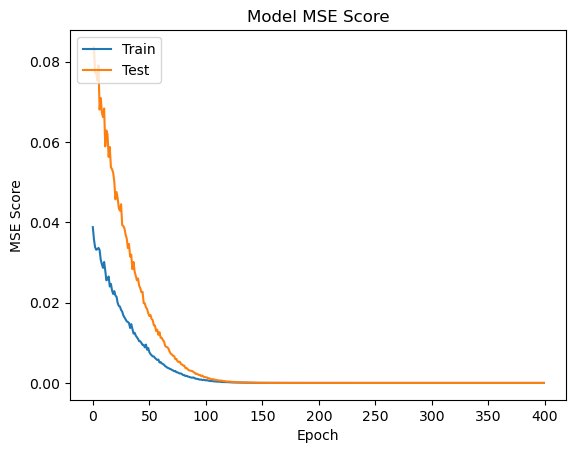

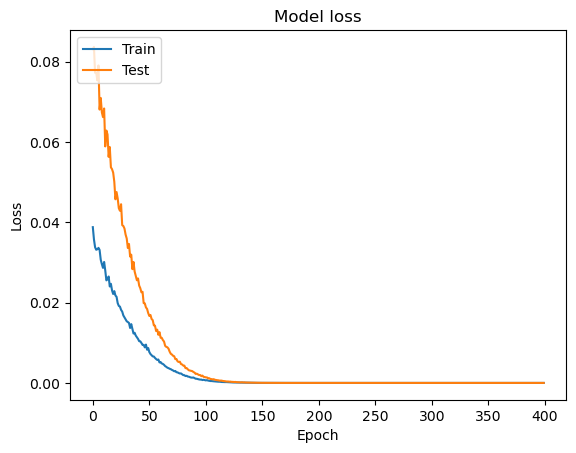

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE Score')
plt.ylabel('MSE Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [27]:
samples = np.array([[100.0,100.0],[23.0, 27.0]])

In [28]:
samples

array([[100., 100.],
       [ 23.,  27.]])

In [29]:
predictions = model.predict(samples)

1/1 [==============================] - 0s 36ms/step


In [30]:
predictions

array([[199.29486 ],
       [ 49.020443]], dtype=float32)

# Regression Tasks - activitaion function = linear

In [31]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    # Input layer is combined with Dense layer
    Dense(20, activation='relu', input_shape=(10,)), 
    # Hidden layer
    Dense(20, activation='relu'),
    # Output layer for regression
    Dense(1, activation='linear')  
])
model.compile(optimizer='adam', loss='mse')


# Binary Classification - 
* Output layer for binary classification 
* loss function 
* Metrics 

In [25]:
model = Sequential([
    Dense(20, activation='relu', input_shape=(10,)),
    Dense(20, activation='relu'),
    # Output layer for binary classification
    Dense(1, activation='sigmoid')  
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Muticlass classification 
* Output layer for multi-class classification
* loss function
* Metrics

In [34]:
num_classes = 3

In [35]:
model = Sequential([
    Dense(20, activation='relu', input_shape=(10,)),
    Dense(20, activation='relu'),
    # Output layer for multiclass classification
    Dense(num_classes, activation='softmax')  
])
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])


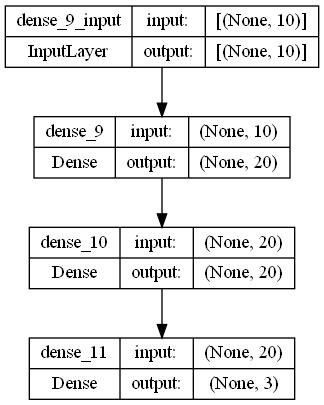

In [36]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)